In [14]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR

import tools

In [15]:
device = torch.device("cpu")

In [16]:
np.random.seed(1)
n = 80
x = np.random.rand(n, 1)-0.5

def fun(x):
    y = np.cos(2* np.pi * x)
    y += 0.3 * np.random.randn(*x.shape)
    return y

y = fun(x)

# Convert to PyTorch tensors
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [17]:
# Split the data into training and test sets
torch.manual_seed(2)
rp = torch.randperm(x.size(0))

n_train = int(x.size(0) * 0.8)
x_train, y_train = x[rp[:n_train]], y[rp[:n_train]]
x_test, y_test = x[rp[n_train:]], y[rp[n_train:]]

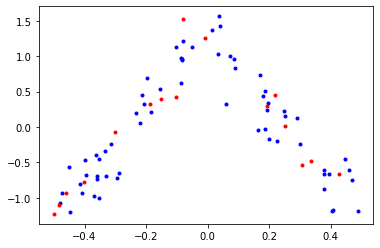

In [18]:
# Plot the data
fix, ax = plt.subplots(1)
ax.plot(x_train, y_train, 'b.')
ax.plot(x_test, y_test, 'r.')

## Define a multi-layer perceptron (MLP) network with two hidden layers

In the code below, we define a neural network architecture with:
* input dimension 1
* one hidden layer with 100 units with tanh nonlinearity
* one hidden layer with 100 units with tanh nonlinearity
* linear output layer with output dimension 1

In [23]:
class MLP(nn.Module):
    def __init__(self):
        # YOUR CODE HERE
        super().__init__()
        self.fc1=nn.Linear(1, 100)
        self.fc2=nn.Linear(100, 100)
        self.fc3=nn.Linear(100, 1)
    def forward(self, x):
        # YOUR CODE HERE
        x=F.tanh(self.fc1(x))
        x=F.tanh(self.fc2(x))
        x=self.fc3(x)
        
        return x

In [24]:
# Create an MLP network
mlp = MLP()
mlp.to(device)

MLP(
  (fc1): Linear(in_features=1, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)

In [25]:
# This visualizes the function implemented by an MLP
def plot_fit(mlp, x_train, y_train):
    fig, ax = plt.subplots(1)
    ax.plot(x_train, y_train, '.')
    x_np = np.linspace(-0.5, 0.5, 100).reshape((-1, 1))
    x = torch.tensor(x_np, device=device, dtype=torch.float)
    pred = mlp.forward(x).cpu().data.numpy()
    ax.plot(x_np, pred)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


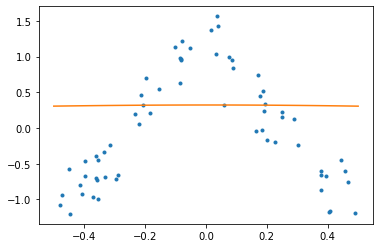

In [26]:
# Plot the function implemented by the MLP
plot_fit(mlp, x_train, y_train)

In [27]:
# This is the function to compute the loss:
def compute_loss(mlp, x, y):
    mlp.eval()
    with torch.no_grad():
        outputs = mlp.forward(x)
        loss = F.mse_loss(outputs, y)
        return loss.cpu().numpy()

# This is the function to print the progress during training
def print_progress(epoch, train_error, val_error):
    print('Epoch {}: Train error: {:.4f}, Test error: {:.4f}'.format(
        epoch, train_error, val_error))

In [28]:
mlp = MLP()
mlp.to(device)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)

In [30]:

n_epochs = 10000
train_errors = []  # Keep track of the training data
val_errors = []  # Keep track of the validation data
x = x_train.to(device)
y = y_train.to(device)
for epoch in range(n_epochs):

    optimizer.zero_grad()
    outputs = mlp.forward(x)
    loss = F.mse_loss(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 500 == 0:
        train_errors.append(compute_loss(mlp, x_train, y_train))
        val_errors.append(compute_loss(mlp, x_test, y_test))
        print_progress(epoch, train_errors[-1], val_errors[-1])

# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
tools.save_model(mlp, 'mlp_noreg.pth', confirm=False)


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 499: Train error: 0.0564, Test error: 0.0693
Epoch 999: Train error: 0.0480, Test error: 0.0729
Epoch 1499: Train error: 0.0338, Test error: 0.1042
Epoch 1999: Train error: 0.0280, Test error: 0.1170
Epoch 2499: Train error: 0.0254, Test error: 0.1290
Epoch 2999: Train error: 0.0232, Test error: 0.1322
Epoch 3499: Train error: 0.0216, Test error: 0.1426
Epoch 3999: Train error: 0.0194, Test error: 0.1413
Epoch 4499: Train error: 0.0196, Test error: 0.1320
Epoch 4999: Train error: 0.0165, Test error: 0.1168
Epoch 5499: Train error: 0.0169, Test error: 0.1145
Epoch 5999: Train error: 0.0160, Test error: 0.1144
Epoch 6499: Train error: 0.0159, Test error: 0.1149
Epoch 6999: Train error: 0.0156, Test error: 0.1160
Epoch 7499: Train error: 0.0248, Test error: 0.1588
Epoch 7999: Train error: 0.0193, Test error: 0.1223
Epoch 8499: Train error: 0.0164, Test error: 0.1292
Epoch 8999: Train error: 0.0141, Test error: 0.1221
Epoch 9499: Train error: 0.0139, Test error: 0.1252
Epoch 9999: Tr

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


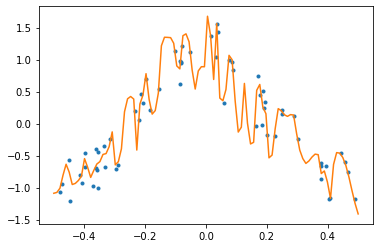

In [31]:
# Plot the final fit
plot_fit(mlp, x_train, y_train)

In [32]:
test_loss_no_regularization = compute_loss(mlp, x_test, y_test)
print("Test loss without regularization: %.5f" % test_loss_no_regularization)

Test loss without regularization: 0.13240


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


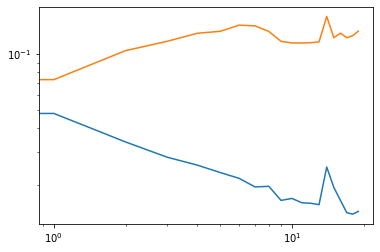

In [33]:
fig, ax = plt.subplots(1)
ax.loglog(train_errors)
ax.loglog(val_errors)

In [34]:
# Early stopping
class EarlyStopping:
    def __init__(self, tolerance, patience):
        """
        Args:
          patience (int):    Maximum number of epochs with unsuccessful updates.
          tolerance (float): We assume that the update is unsuccessful if the validation error is larger
                              than the best validation error so far plus this tolerance.
        """
        self.tolerance = tolerance
        self.patience = patience
    
    def stop_criterion(self, val_errors):
        """
        Args:
          val_errors (iterable): Validation errors after every update during training.
        
        Returns: True if training should be stopped: when the validation error is larger than the best
                  validation error obtained so far (with given tolearance) for patience epochs (number of consecutive epochs for which the criterion is satisfied).
                 
                 Otherwise, False.
        """
        if len(val_errors) <= self.patience:
            return False

        min_val_error = min(val_errors)
        val_errors = np.array(val_errors[-self.patience:])
        return all(val_errors > min_val_error + self.tolerance)

In [35]:
mlp = MLP()
mlp.to(device)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

In [36]:
# Train the network with early stopping
n_epochs = 10000
train_errors = []  # Keep track of the training error
val_errors = []  # Keep track of the validation error
early_stop = EarlyStopping(tolerance=0.01, patience=20)

x = x_train.to(device)
y = y_train.to(device)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = mlp.forward(x)
    loss = F.mse_loss(outputs, y)
    loss.backward()
    optimizer.step()

    train_errors.append(compute_loss(mlp, x_train, y_train))
    val_errors.append(compute_loss(mlp, x_test, y_test))

    if early_stop.stop_criterion(val_errors):
        print(val_errors[epoch])
        print('Stop after %d epochs' % epoch)
        break

    if (epoch+1) % 100 == 0:
        print_progress(epoch, train_errors[epoch], val_errors[epoch])

# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
tools.save_model(mlp, 'mlp_early.pth', confirm=False)
   

Epoch 99: Train error: 0.0920, Test error: 0.0713
Epoch 199: Train error: 0.0665, Test error: 0.0585
Epoch 299: Train error: 0.0662, Test error: 0.0598
Epoch 399: Train error: 0.0661, Test error: 0.0596
Epoch 499: Train error: 0.0660, Test error: 0.0598
Epoch 599: Train error: 0.0658, Test error: 0.0600
Epoch 699: Train error: 0.0658, Test error: 0.0603
Epoch 799: Train error: 0.0656, Test error: 0.0605
Epoch 899: Train error: 0.0655, Test error: 0.0608
Epoch 999: Train error: 0.0651, Test error: 0.0609
Epoch 1099: Train error: 0.0647, Test error: 0.0610
Epoch 1199: Train error: 0.0642, Test error: 0.0611
Epoch 1299: Train error: 0.0636, Test error: 0.0612
Epoch 1399: Train error: 0.0628, Test error: 0.0614
Epoch 1499: Train error: 0.0621, Test error: 0.0618
Epoch 1599: Train error: 0.0614, Test error: 0.0619
Epoch 1699: Train error: 0.0608, Test error: 0.0620
Epoch 1799: Train error: 0.0603, Test error: 0.0623
Epoch 1899: Train error: 0.0596, Test error: 0.0627
Epoch 1999: Train error

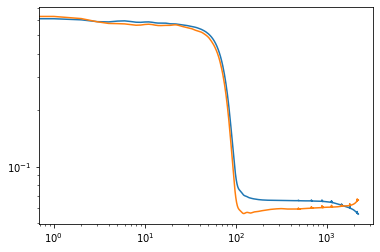

In [38]:
# Plot the learning curves
fig, ax = plt.subplots(1)
ax.loglog(train_errors)
ax.loglog(val_errors)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


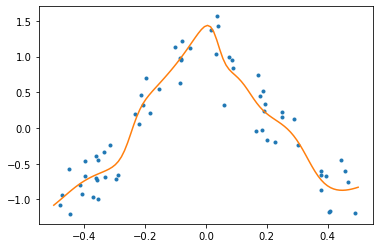

In [39]:
# Plot the final fit
plot_fit(mlp, x_train, y_train)

In [40]:
test_loss_early_stopping = compute_loss(mlp, x_test, y_test)
print("Test loss with early stopping: %.5f" % test_loss_early_stopping)

Test loss with early stopping: 0.06655


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [43]:
# Weight-decay regularization
# Train an MLP with L2 regularization
mlp = MLP()
mlp.to(device)

# Create an Adam optimizer with learning rate 0.01 and weight decay parameter 0.001
# optimizer = ...
# YOUR CODE HERE
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

In [45]:
n_epochs = 4000
train_errors = []
val_errors = []

x = x_train.to(device)
y = y_train.to(device)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = mlp.forward(x)
    loss = F.mse_loss(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        train_errors.append(compute_loss(mlp, x_train, y_train))
        val_errors.append(compute_loss(mlp, x_test, y_test))
        print_progress(epoch, train_errors[-1], val_errors[-1])

# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
tools.save_model(mlp, 'mlp_wd.pth', confirm=False)
 

Epoch 99: Train error: 0.2311, Test error: 0.2025
Epoch 199: Train error: 0.0667, Test error: 0.0553
Epoch 299: Train error: 0.0661, Test error: 0.0581
Epoch 399: Train error: 0.0660, Test error: 0.0595
Epoch 499: Train error: 0.0659, Test error: 0.0602
Epoch 599: Train error: 0.0657, Test error: 0.0605
Epoch 699: Train error: 0.0655, Test error: 0.0605
Epoch 799: Train error: 0.0652, Test error: 0.0603
Epoch 899: Train error: 0.0649, Test error: 0.0599
Epoch 999: Train error: 0.0643, Test error: 0.0594
Epoch 1099: Train error: 0.0632, Test error: 0.0589
Epoch 1199: Train error: 0.0606, Test error: 0.0601
Epoch 1299: Train error: 0.0589, Test error: 0.0642
Epoch 1399: Train error: 0.0579, Test error: 0.0685
Epoch 1499: Train error: 0.0569, Test error: 0.0724
Epoch 1599: Train error: 0.0560, Test error: 0.0753
Epoch 1699: Train error: 0.0551, Test error: 0.0761
Epoch 1799: Train error: 0.0543, Test error: 0.0766
Epoch 1899: Train error: 0.0537, Test error: 0.0773
Epoch 1999: Train error

In [46]:
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


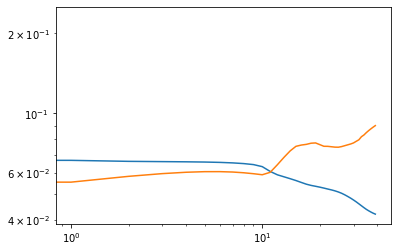

In [47]:
fig, ax = plt.subplots(1)
ax.loglog(train_errors)
ax.loglog(val_errors)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


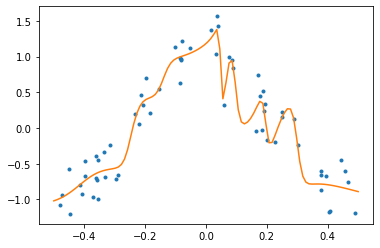

In [48]:
# Plot the final fit
plot_fit(mlp, x_train, y_train)

In [49]:
test_loss_weight_decay = compute_loss(mlp, x_test, y_test)
print("Test loss with weight decay: %.5f" % test_loss_weight_decay)

Test loss with weight decay: 0.09002


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [68]:
# Injecting noise to inputs
def add_noise(x, noise_std):
    """Add Gaussian noise to a PyTorch tensor.
    
    Args:
      x (tensor): PyTorch tensor of inputs.
      noise_std (float): Standard deviation of the Gaussian noise.
      
    Returns:
      x: Tensor with Gaussian noise added.
    """
    # YOUR CODE HERE
#     noise = torch.autograd.Variable(x.data.new(x.size()).normal_(mean, stddev))
    noise = torch.randn(x.size()) * noise_std 
    return x + noise

In [69]:
# Let's test shapes
x = torch.randn(10)
x_with_noise = add_noise(x, 0.5)
assert x_with_noise.shape == x.shape, f"Bad x_with_noise.shape: {x_with_noise.shape}"

In [70]:
mlp = MLP()
mlp.to(device)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)

In [72]:
# Train MLP with injecting noise to inputs

n_epochs = 4000
train_errors = []
val_errors = []
x = x_train.to(device)
y = y_train.to(device)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = mlp.forward(add_noise(x, noise_std=0.05))
    loss = F.mse_loss(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        train_errors.append(compute_loss(mlp, x_train, y_train))
        val_errors.append(compute_loss(mlp, x_test, y_test))
        print_progress(epoch, train_errors[-1], val_errors[-1])

# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
tools.save_model(mlp, 'mlp_noiseinj.pth', confirm=False)


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 99: Train error: 0.0852, Test error: 0.0740
Epoch 199: Train error: 0.0807, Test error: 0.0736
Epoch 299: Train error: 0.0644, Test error: 0.0728
Epoch 399: Train error: 0.0656, Test error: 0.0825
Epoch 499: Train error: 0.0638, Test error: 0.0783
Epoch 599: Train error: 0.0671, Test error: 0.0680
Epoch 699: Train error: 0.0650, Test error: 0.0770
Epoch 799: Train error: 0.0644, Test error: 0.0657
Epoch 899: Train error: 0.0677, Test error: 0.0759
Epoch 999: Train error: 0.0657, Test error: 0.0629
Epoch 1099: Train error: 0.0637, Test error: 0.0874
Epoch 1199: Train error: 0.0788, Test error: 0.1026
Epoch 1299: Train error: 0.0672, Test error: 0.0707
Epoch 1399: Train error: 0.0621, Test error: 0.0791
Epoch 1499: Train error: 0.0629, Test error: 0.0692
Epoch 1599: Train error: 0.0623, Test error: 0.0714
Epoch 1699: Train error: 0.0623, Test error: 0.0687
Epoch 1799: Train error: 0.0651, Test error: 0.0768
Epoch 1899: Train error: 0.0659, Test error: 0.0933
Epoch 1999: Train error

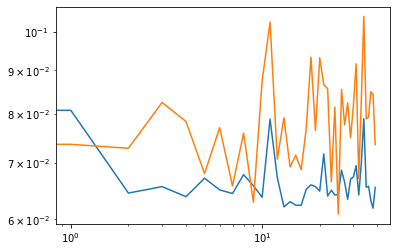

In [74]:
# Plot the learning curves

fig, ax = plt.subplots(1)
ax.loglog(train_errors)
ax.loglog(val_errors)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


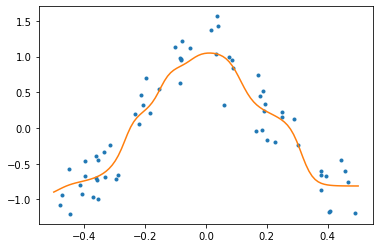

In [75]:
# Plot the final fit
plot_fit(mlp, x_train, y_train)

In [76]:
# Let's look at the test loss
test_loss_inj_noise = compute_loss(mlp, x_test, y_test)
print("Test loss with noise injection: %.5f" % test_loss_inj_noise)

Test loss with noise injection: 0.07353


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [77]:
# Dropout
# https://arxiv.org/abs/1207.0580
class MLPDropout(nn.Module):
    def __init__(self):
        # YOUR CODE HERE
        super().__init__()
        self.fc1=nn.Linear(1, 100)
        self.fc2=nn.Linear(100, 100)
        self.fc3=nn.Linear(100, 1)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        # YOUR CODE HERE
        x=F.tanh(self.fc1(x))
        x=self.dropout(x)
        x=F.tanh(self.fc2(x))
        x=self.dropout(x)
        x=self.fc3(x)
        
 
        return x

In [78]:
mlp = MLPDropout()
print(mlp)

MLPDropout(
  (fc1): Linear(in_features=1, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [79]:
mlp = MLPDropout()
mlp.to(device)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.01)

In [80]:
#scheduler = StepLR(optimizer, step_size=100, gamma=0.95)
n_epochs = 4000
train_errors = []
val_errors = []

x = x_train.to(device)
y = y_train.to(device)

for epoch in range(n_epochs):
    #scheduler.step()
    mlp.train()
    optimizer.zero_grad()
    outputs = mlp.forward(x)
    loss = F.mse_loss(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        mlp.eval()
        train_errors.append(compute_loss(mlp, x_train, y_train))
        val_errors.append(compute_loss(mlp, x_test, y_test))
        print_progress(epoch, train_errors[-1], val_errors[-1])

# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
tools.save_model(mlp, 'mlp_dropout.pth', confirm=False)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 99: Train error: 0.0803, Test error: 0.0963
Epoch 199: Train error: 0.0742, Test error: 0.1009
Epoch 299: Train error: 0.0695, Test error: 0.0921
Epoch 399: Train error: 0.0714, Test error: 0.0876
Epoch 499: Train error: 0.0681, Test error: 0.0850
Epoch 599: Train error: 0.0690, Test error: 0.0811
Epoch 699: Train error: 0.0764, Test error: 0.0864
Epoch 799: Train error: 0.0667, Test error: 0.0879
Epoch 899: Train error: 0.0650, Test error: 0.0838
Epoch 999: Train error: 0.0636, Test error: 0.0852
Epoch 1099: Train error: 0.0639, Test error: 0.0814
Epoch 1199: Train error: 0.0673, Test error: 0.0939
Epoch 1299: Train error: 0.0830, Test error: 0.0804
Epoch 1399: Train error: 0.0643, Test error: 0.0743
Epoch 1499: Train error: 0.0629, Test error: 0.0819
Epoch 1599: Train error: 0.0640, Test error: 0.0785
Epoch 1699: Train error: 0.0656, Test error: 0.0839
Epoch 1799: Train error: 0.0671, Test error: 0.0899
Epoch 1899: Train error: 0.0631, Test error: 0.0751
Epoch 1999: Train error

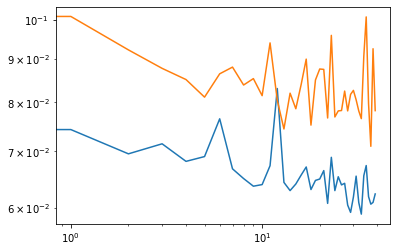

In [81]:
fig, ax = plt.subplots(1)
ax.loglog(train_errors)
ax.loglog(val_errors)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


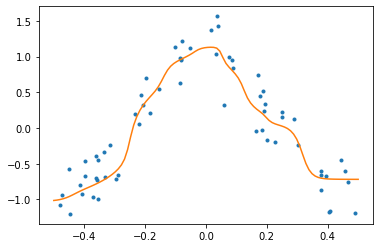

In [82]:
mlp.eval()
plot_fit(mlp, x_train, y_train)

In [83]:
# Let's look at the test loss
test_loss_dropout = compute_loss(mlp, x_test, y_test)
print("Test loss with dropout: %.5f" % test_loss_dropout)

Test loss with dropout: 0.07814


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [85]:
# Reducing model capacity

Another simple way to reduce overfitting is to reduce the capacity of the model. Let us use for the same regression task a much smaller network: an MLP with one hidden layer with five units, tanh nonlinearity in the hidden layer and a linear output layer.

In [86]:
class MLPSmall(nn.Module):
    def __init__(self):
        super(MLPSmall, self).__init__()
        # YOUR CODE HERE
        super().__init__()
        self.fc1=nn.Linear(1, 5)
        self.fc2=nn.Linear(5, 1)
    
    def forward(self, x):
        # YOUR CODE HERE
        x=F.tanh(self.fc1(x))
        x=self.fc2(x)
        
        return(x)

In [87]:
mlp = MLPSmall()
mlp.to(device)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

In [88]:
n_epochs = 10000
train_errors = []  # Keep track of the training data
val_errors = []  # Keep track of the validation data

x = x_train.to(device)
y = y_train.to(device)

for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = mlp.forward(x)
    loss = F.mse_loss(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 500 == 0:
        train_errors.append(compute_loss(mlp, x_train, y_train))
        val_errors.append(compute_loss(mlp, x_test, y_test))
        print_progress(epoch, train_errors[-1], val_errors[-1])

# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
tools.save_model(mlp, 'mlp_small.pth', confirm=False)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 499: Train error: 0.5942, Test error: 0.6043
Epoch 999: Train error: 0.5790, Test error: 0.5639
Epoch 1499: Train error: 0.5505, Test error: 0.5135
Epoch 1999: Train error: 0.4943, Test error: 0.4454
Epoch 2499: Train error: 0.3351, Test error: 0.2856
Epoch 2999: Train error: 0.1254, Test error: 0.0935
Epoch 3499: Train error: 0.0809, Test error: 0.0609
Epoch 3999: Train error: 0.0732, Test error: 0.0564
Epoch 4499: Train error: 0.0698, Test error: 0.0557
Epoch 4999: Train error: 0.0679, Test error: 0.0564
Epoch 5499: Train error: 0.0669, Test error: 0.0578
Epoch 5999: Train error: 0.0664, Test error: 0.0592
Epoch 6499: Train error: 0.0662, Test error: 0.0603
Epoch 6999: Train error: 0.0662, Test error: 0.0611
Epoch 7499: Train error: 0.0661, Test error: 0.0616
Epoch 7999: Train error: 0.0661, Test error: 0.0617
Epoch 8499: Train error: 0.0661, Test error: 0.0617
Epoch 8999: Train error: 0.0661, Test error: 0.0617
Epoch 9499: Train error: 0.0661, Test error: 0.0616
Epoch 9999: Tr

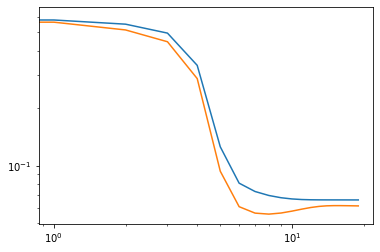

In [90]:
fig, ax = plt.subplots(1)
ax.loglog(train_errors)
ax.loglog(val_errors)

/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


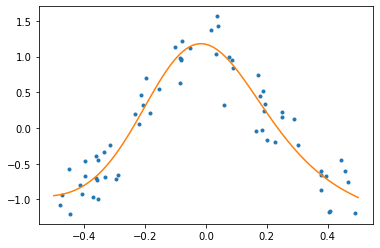

In [91]:
# Plot the final fit
mlp.eval()
plot_fit(mlp, x_train, y_train)

In [92]:
# Let's look at the test loss
test_loss_small = compute_loss(mlp, x_test, y_test)
print("Test loss by reducing model capacity: %.5f" % test_loss_small)

Test loss by reducing model capacity: 0.06151


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [94]:
# We can summarize the results obtained with different regularization methods:
print("Loses:")
print('No regularization: %.5f' % test_loss_no_regularization)
print('Early stopping:    %.5f' % test_loss_early_stopping)
print('Weight decay:      %.5f' % test_loss_weight_decay)
print('Noise injection:   %.5f' % test_loss_inj_noise)
print('Dropout:           %.5f' % test_loss_dropout)
print('Small network:     %.5f' % test_loss_small)

Loses:
No regularization: 0.13240
Early stopping:    0.06655
Weight decay:      0.09002
Noise injection:   0.07353
Dropout:           0.07814
Small network:     0.06151
